# Figure generation
This notebook is used to generate the figures for the publication

In [5]:
#Imports
#Data handling
import pandas as pd
#Create data arrays
import numpy as np
#Machine learning models
import tensorflow as tf
#Plotting
import matplotlib.pyplot as plt
#Create Folder for modelling checkpoint
import os
#Normalization
from sklearn.preprocessing import MinMaxScaler

import sys  
sys.path.append("../src/")  
from utils.old.modelgenerator import *
#For svm model
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from keras import layers, models

import seaborn as sns

In [7]:
#Get data 
cwd = os.path.normpath(os.path.dirname(os.getcwd()))
df = pd.read_csv(cwd+'/data/3final_data/Final_Grossload_dataset.csv', index_col='Date') #df = pd.read_csv('user5.csv')
df.index = pd.to_datetime(df.index)
#df = df[['User5', 'temp', 'rhum']]
df.fillna(0, inplace=True)

#Select only 1 User for testing
#df = df[['User2', 'temp', 'rhum', 'wspd', 'PC1', 'hour sin', 'hour cos', 'User2_lag_24hrs']]
#df.head(3)

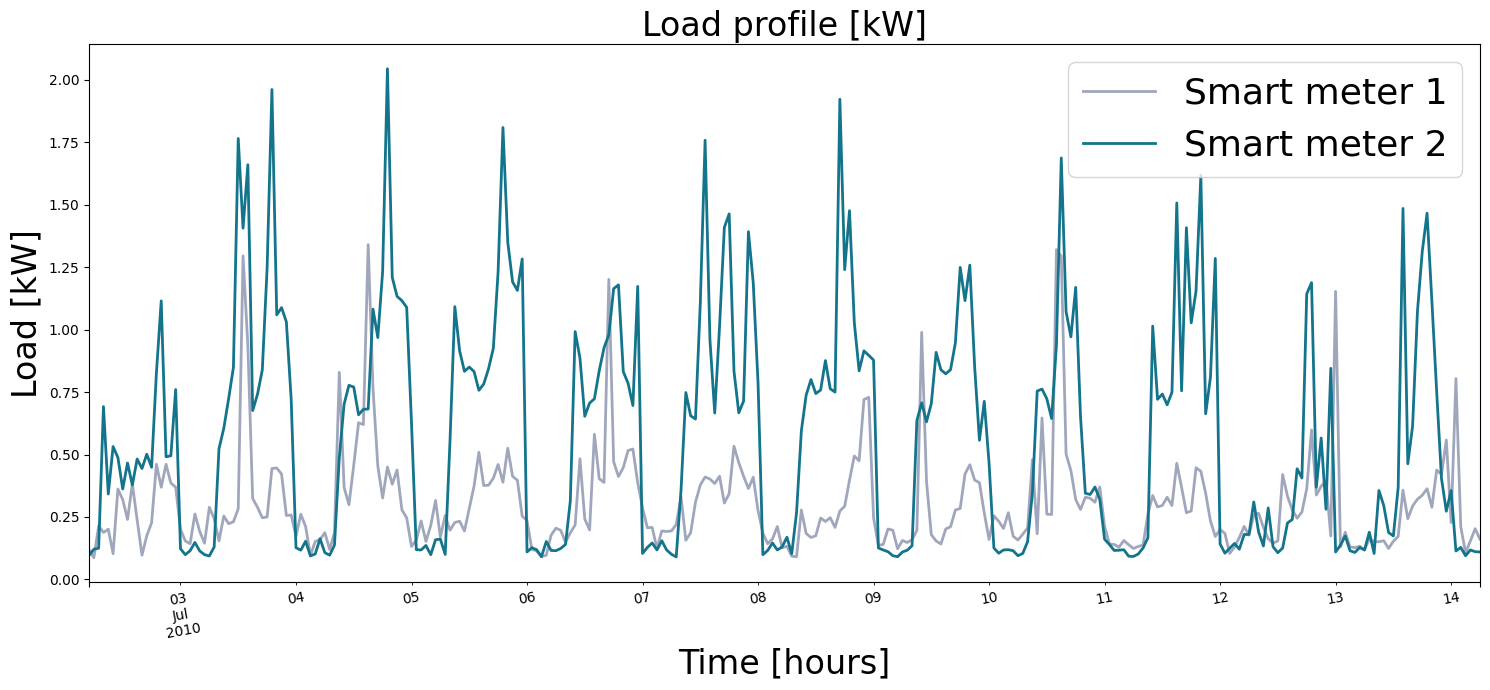

In [9]:
# FIGURE 2
plot1 = df[['User12', 'User11']][5:295].plot(
             figsize=(15,7), 
             kind="line",
             color = ['#A0A7BC', '#13748B'],
             lw=2,
             rot=10
            )
plot1.set_title('Load profile [kW]', fontsize=24)
plot1.set_xlabel('Time [hours]', fontsize=24)
plot1.set_ylabel('Load [kW]', fontsize=24)
plot1.xaxis.set_tick_params(labelsize=24)
plot1.figure.tight_layout()
plot1.legend(["Smart meter 1", "Smart meter 2"], fontsize=26)
#plot1.figure.savefig('images/SVM_format/Figure6_exampleLoadProfilesOfTwoSmartMeters.svg', bbox_inches="tight")

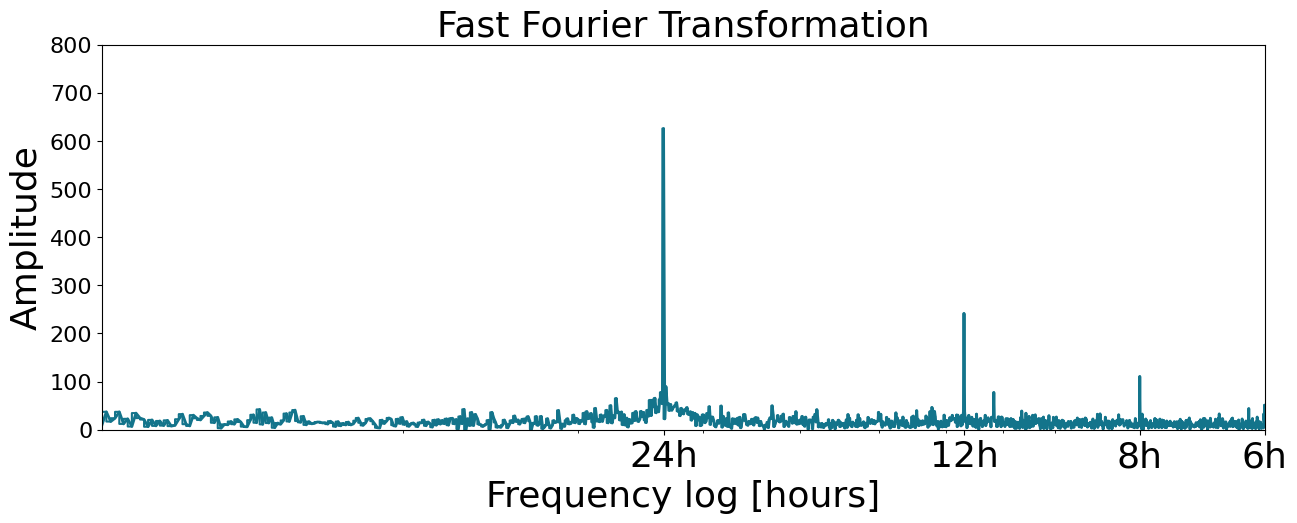

In [7]:
#Tensorflow
import tensorflow as tf
#plot numpy array
import matplotlib.pyplot as plt

fft = tf.signal.fft(df['User12'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['User12'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.figure(figsize=(15, 5))
plt.plot(f_per_year, np.abs(fft), "#13748B", lw=2, )
plt.step(f_per_year, np.abs(fft), "#13748B")
plt.xscale('log')
plt.ylim(0, 800)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524,365.2524*2,365.2524*3,365.2524*4], labels=['1Year', '24h','12h','8h','6h'], fontsize=26)
plt.yticks(fontsize=16)
plt.xlim(100.0, 365.2524*4)

plt.title('Fast Fourier Transformation', fontsize=26)
plt.xlabel('Frequency log [hours]', fontsize=26)
plt.ylabel('Amplitude', fontsize=26)
plt.savefig('images/SVM_format/Figure4_fastFourierTransformationLoadData.svg', bbox_inches="tight")

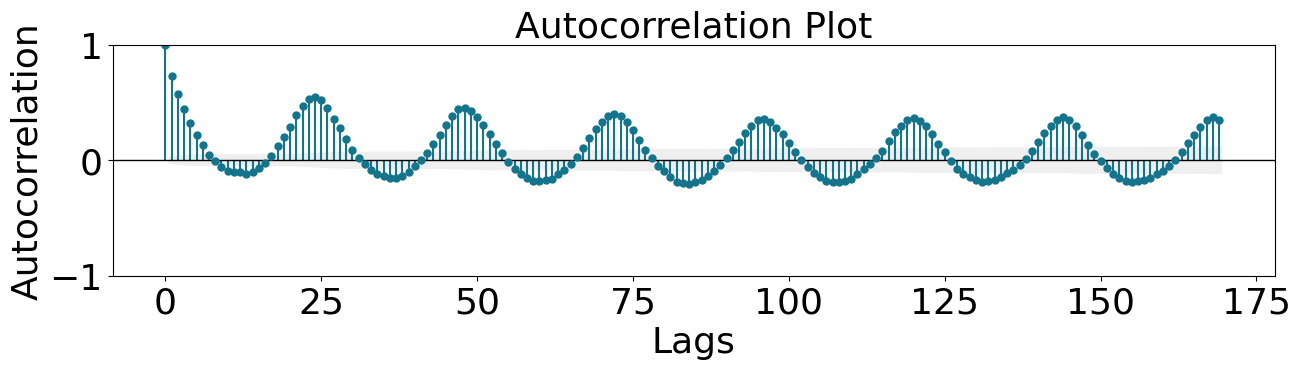

In [8]:
import statsmodels.api as sm
def plot_acf_colors(ax, markercolor="#13748B", linecolor="black", facecolor="silver", barcolor="#13748B", linewidth=1):
    """utility function to get some control over colors with  plot_acf()"""
    from statsmodels.graphics.tsaplots import plot_pacf
    from statsmodels.graphics.tsaplots import plot_acf
    from matplotlib.collections import PolyCollection, LineCollection
    for item in ax.collections:
        # change the color of the confidence interval 
        if type(item) == PolyCollection:
            item.set_facecolor(facecolor)
        # change the color of the vertical lines
        if type(item) == LineCollection:
            item.set_color(barcolor)
    # change the color of the markers
    [line.get_label() for line in ax.lines]
    for item in ax.lines:
        item.set_color(markercolor)
    # change the color of the horizontal lines
    ax.lines[0].set_color(linecolor)
    ax.lines[0].set_linewidth(linewidth)
    #ax.lines.remove(ax.lines[0])
    return ax

f, ax = plt.subplots(figsize=(15, 3))
autocorrelation = sm.graphics.tsa.plot_acf(
    df['User12'][:10000].values, 
    lags=169, 
    alpha=0.01, 
    ax=ax,
    )
# Customize the plot color and font size
ax.set_title('Autocorrelation Plot', fontsize=26)
ax.set_xlabel('Lags', fontsize=26)
ax.set_ylabel('Autocorrelation', fontsize=26)
ax.tick_params(axis='both', labelsize=26)
ax = plot_acf_colors(ax)

plt.savefig('images/SVM_format/Figure5_autocorrelation_user12.svg', bbox_inches="tight")

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Get data 
cwd = os.path.normpath(os.path.dirname(os.getcwd()))
df_raw = pd.read_csv(cwd+'/data/2feature_engineering_data/df_with_final_features.csv', index_col='Date') #df = pd.read_csv('user5.csv')
df_raw.index = pd.to_datetime(df_raw.index)
df = df_raw[['User12', 'temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres']]
df.fillna(0, inplace=True)

n_components = 1  # Replace with the number of components you want
# Extract the weather features from your DataFrame
weather_features = df[['temp', 'rhum', 'dwpt', 'wdir', 'wspd', 'pres']]
# Standardize the data
scaler = StandardScaler()
scaled_weather_features = scaler.fit_transform(weather_features)

# Create a PCA instance with the desired number of components
pca = PCA(n_components=n_components)
# Fit and transform the scaled data using PCA
principal_components = pca.fit_transform(scaled_weather_features)
# Create a DataFrame to store the principal components
pc_df = pd.DataFrame(data=principal_components, index=df.index, columns=[f'PC{i+1}' for i in range(n_components)])
# Add the principal components back to your original DataFrame if needed
df_with_pcs = pd.concat([df, pc_df], axis=1, )
# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_var_ratio)

f, ax = plt.subplots(figsize=(15, 6))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
#Compute pairwise correlation of columns, excluding NA/null values.
corr_spearman = df_with_pcs.corr(method="spearman")
corr_pearson = df_with_pcs.corr(method="pearson")
#Plot heatmap, use _ to hide instance output
plot2 = sns.heatmap(data=corr_spearman, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), #color map
            square=False, 
            annot=True,
            annot_kws={"size": 20},
            )
plot2.figure.savefig('FIGURE3_pearsonCorrleationWeather.svg', bbox_inches="tight")

df_with_pcs_all = pd.concat([df_raw, pc_df], axis=1, )
corr_spearman_all = df_with_pcs_all.corr(method="spearman")
corr_pearson_all = df_with_pcs_all.corr(method="pearson")
# Select the columns you want to calculate the average for
selected_columns = ['temp', 'rhum', 'dwpt', 'wdir', 'wspd', 'pres', 'PC1']

# Calculate the average over all users for the selected columns
average_spearman_corr_over_all_users_weather = corr_spearman_all[selected_columns].iloc[:36].mean()
average_pearson_corr_over_all_users_weather = corr_spearman_all[selected_columns].iloc[:36].mean()

print("Spearman:")
print(average_spearman_corr_over_all_users_weather)
print("Pearson:")
print(average_pearson_corr_over_all_users_weather)

KeyError: "['dwpt', 'wdir', 'pres'] not in index"